# Austin Leak Maps (non-interactive)

Author: Janice Zhuang \
Python 2.7x \
Assuming organized leaks data in a separate code (still in progress - currently only in Matlab)

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
# IMPORTANT NOTE: having difficulting writing the crs to shp using geopands to_file
# Can do it manually using notepad++ though. WORK IN PROGRESS
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline
import janmaps as jm # personal functions for mapping

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='XXX',api_key='XXX')
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)

## Reading inputs: excel data & polygon shapefile

In [3]:
# Read in excel file 
# (points = leaks data)
df_filename = 'LeaksRepaired_mlab_2018-01-24.xlsx'
df_dir = 'LR24'
df_path = os.path.join(os.getcwd(), df_dir, df_filename)
df = pd.read_excel(df_path,sheet_name='Sheet1')

# Get data: coordinates
# coordinate system = WGS 1984 Web Mercator Auxiliary Sphere (epsg:3857)
coordX = df.X
coordY = df.Y

# Create geodataframe from data
pts_geometry = [Point(xy) for xy in zip(coordX, coordY)]
pts_crs = {'init':'epsg:3857'}
points = gpd.GeoDataFrame(df, crs=pts_crs, geometry=pts_geometry)

In [4]:
# Read in shapefile - sensors
shp_filename = 'CitySensors.shp'
shp_dir = 'LR24\shapefiles\Sensors'
shp_path = os.path.join(os.getcwd(), shp_dir, shp_filename)
citySensors = gpd.read_file(shp_path)

shp_filename = 'UTSensors.shp'
shp_dir = 'LR24\shapefiles\Sensors'
shp_path = os.path.join(os.getcwd(), shp_dir, shp_filename)
uniSensors = gpd.read_file(shp_path)

In [5]:
# Read in shapefiles from water network
# (Austin Water pipes)
shp_filename = 'AWpipes.shp'
shp_dir = 'LR24\shapefiles\pipes'
shp_path = os.path.join(os.getcwd(), shp_dir, shp_filename)
pipes = gpd.read_file(shp_path)

In [6]:
# Read in polygon shapefile for areas
# (zipcodes)
shp_filename = 'Austinzipcodes.shp'
shp_dir = 'LR24\shapefiles\zipcodes'
shp_path = os.path.join(os.getcwd(), shp_dir, shp_filename)
area = gpd.read_file(shp_path)

In [7]:
# Read in shapefile for specific focus area, for cutting unused polygons
# (Austin Water Utility service area)
shpCut_filename = 'AWUServiceArea.shp'
shpCut_dir = 'LR24\shapefiles\ServiceArea'
shpCut_path = os.path.join(os.getcwd(), shpCut_dir, shpCut_filename)
cut_area = gpd.read_file(shpCut_path)

Optional displaying data, for convenience:

In [6]:
# Optional: See (points) data table
points

,HomeNo,SubAddress1,StName,SubAddress2,SubAddress3,City,ZIP,AddressID,MapZone,ObjectID,...,LeakRepairedTime,LeakRepairedTime2,DaysElapsed,Week,Month,Year,Bi-Week,DateOnly,FullStName,geometry
0,9605,N,FM 973,RD,NaN,AUSTIN,78653,3374522,NaN,1038936,...,1475183160000,2016-09-29 21:06:00,NaN,40,9,2016,40,9/29/2016,9605 N FM 973 RD,POINT (-10860848.8235 3542441.27329999)
1,7304,NaN,LONGFORD,TRL,NaN,AUSTIN,78653,5092550,528G,1056782,...,1476421748847,2016-10-14 05:09:08,0.317464,42,10,2016,42,10/14/2016,7304 LONGFORD TRL,POINT (-10865000.6851 3549474.4441)
2,6413,NaN,BOYCE,LN,NaN,MANOR,78653,3047359,528B,1048143,...,1475816870934,2016-10-07 05:07:50,0.126284,41,10,2016,42,10/7/2016,6413 BOYCE LN,POINT (-10865699.4999 3550194.7531)
3,6413,NaN,BOYCE,LN,NaN,MANOR,78653,3047359,528B,1050326,...,1475896952854,2016-10-08 03:22:32,1.053158,41,10,2016,42,10/8/2016,6413 BOYCE LN,POINT (-10865699.4999 3550194.7531)
4,5600,NaN,WAR ADMIRAL,DR,NaN,DEL VALLE,78617,3049059,678P,1097471,...,1480307851468,2016-11-28 04:37:31,0.273281,49,11,2016,50,11/28/2016,5600 WAR ADMIRAL DR,POINT (-10865812.9825 3525692.1875)
5,9775,E,US 290 HWY,SVRD,2018-01-02 00:00:00,AUSTIN,78724,5077135,528X,1261617,...,1493188657071,2017-04-26 06:37:37,0.476818,17,4,2017,18,4/26/2017,9775 1/2 E US 290 HWY SVRD EB,POINT (-10865815.5598 3546548.6322)
6,16118,NaN,FM 812,RD,NaN,AUSTIN,78617,3372550,738P,1213275,...,1489131451918,2017-03-10 07:37:31,0.407314,10,3,2017,10,3/10/2017,16118 FM 812 RD,POINT (-10865883.3765 3516941.32859999)
7,9500,NaN,DECKER,LN,NaN,AUSTIN,78724,3050731,NaN,1169608,...,1485551640000,2017-01-27 21:14:00,NaN,4,1,2017,4,1/27/2017,9500 DECKER LN,POINT (-10865906.9717 3544933.22439999)
8,15001,NaN,JACOBSON,RD,NaN,DEL VALLE,78617,99534,NaN,1312146,...,1499711400000,2017-07-10 18:30:00,NaN,28,7,2017,28,7/10/2017,15001 JACOBSON RD,POINT (-10865926.1574 3520651.5318)
9,11920,NaN,DUNFRIES,LN,NaN,AUSTIN,78754,3127585,528F,1033915,...,1474760252967,2016-09-24 23:37:32,0.295520,39,9,2016,40,9/24/2016,11920 DUNFRIES LN,POINT (-10865932.9761 3549424.0451)


Text(0.5,1,u'Points Data')

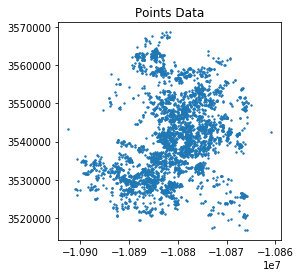

In [7]:
# Optional: Plot excel data (points)
#plt.plot(coordX, coordY, marker='o', color='C0', linestyle='None', markersize=2)
fig, ax = plt.subplots(figsize=[4,4])
points.plot(ax=ax, marker='o', markersize=2)
plt.title('Points Data')

Text(0.5,1,u'Polygons (for choropleth) shapefile')

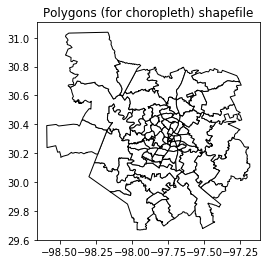

In [8]:
# Optional: Plot shapefile
area.plot(color='white', edgecolor='black')
plt.title('Polygons (for choropleth) shapefile')

Text(0.5,1,u'Focal Area (for cutting) shapefile')

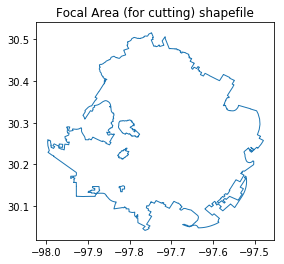

In [9]:
# Optional: Plot shapefile
cut_area.plot(color='white', edgecolor='C0')
plt.title('Focal Area (for cutting) shapefile')

## Some data & shapefile manipulation

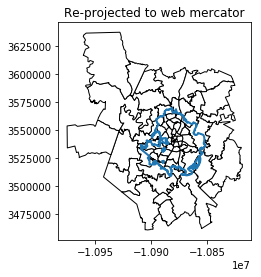

In [8]:
# Re-projecting shapefiles to same coordinate system as points data
area = area.to_crs(pts_crs)
base = area.plot(color='white', edgecolor='black')
plt.title('Re-projected to web mercator')

cut_area = cut_area.to_crs(pts_crs)
cut_area.plot(ax=base, color='None', edgecolor='C0', linewidth=2)

#pipes = pipes.to_crs(pts_crs)

# Get data: geometry
area_geometry = area.geometry
points_geometry = points.geometry
cut_geometry = cut_area.geometry

Text(0.5,1,u'Zipcodes in focal area')

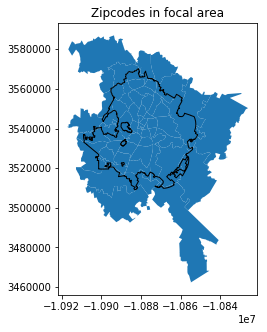

In [9]:
# Only use polygons that intersect with focal/cut area
# to make plotting look nicer
fig, ax = plt.subplots(figsize=[5,5])
ax.set_aspect('equal')

# create cut boundary
cut_boundary = cut_area.loc[0].geometry
# create new geodataframe with polygons that intersect cut boundary
# = w/in focal area
newarea = area[area.geometry.intersects(cut_boundary)]

# plot to check
newarea.plot(ax=ax)
cut_area.plot(ax=ax,color='None', edgecolor='black')
ax.set_title('Zipcodes in focal area')

In [12]:
# Optional: new areas table
newarea

,objectid,name,shape_len,zipcodes_i,modified_d,created_da,modified_b,created_by,geodb_oid,shape_area,zipcode,geometry
0,1.0,AUSTIN,98511.305637,54.0,None,None,None,None,1.0,3.691369e+08,78754,POLYGON ((-10868853.99542967 3555413.462051475...
2,3.0,AUSTIN,97785.793334,56.0,None,None,None,None,3.0,3.383405e+08,78739,POLYGON ((-10897066.70566549 3530496.301000925...
4,5.0,AUSTIN,121428.596913,58.0,None,None,None,None,5.0,4.792590e+08,78732,POLYGON ((-10895175.64269098 3559984.048974039...
5,6.0,AUSTIN,206132.564319,59.0,None,None,None,None,6.0,1.320054e+09,78737,POLYGON ((-10911397.99422128 3534651.607400042...
6,14.0,AUSTIN,32255.603374,8.0,None,None,None,None,14.0,4.778767e+07,78756,POLYGON ((-10879022.56473415 3545917.366079164...
7,15.0,AUSTIN,55142.876610,9.0,None,None,None,None,15.0,1.953556e+08,78723,POLYGON ((-10872062.18614475 3540319.176226617...
10,18.0,DEL VALLE,273994.824301,12.0,None,None,None,None,18.0,1.885224e+09,78617,POLYGON ((-10855457.68717376 3531739.444047777...
11,19.0,CEDAR PARK,165869.023602,13.0,None,None,None,None,19.0,7.051154e+08,78613,POLYGON ((-10891306.73728909 3573137.270944116...
12,20.0,AUSTIN,103966.108075,14.0,None,None,None,None,20.0,3.345571e+08,78733,POLYGON ((-10891827.27213824 3545149.136407329...
13,21.0,ELGIN,488614.213322,15.0,None,None,None,None,21.0,4.302902e+09,78621,POLYGON ((-10834685.27379776 3555145.783769276...


## PLOT: Pipe characteristics per area:

## PLOT: Avg. failure rate per area:

In [ ]:
# Failure rate = monthly

# if leak falls within a area, add area id as a column
points_gdf = points
areas_gdf = newarea
areas_gdf = areas_gdf.to_crs(pts_crs)
areaID_list = []
for point in points_gdf.geometry:
    for poly in areas_gdf.geometry:
        if poly.contains(point):
            ID = areas_gdf.loc[areas_gdf['geometry'] == poly]['zipcode']
            areaID_list.append(int(ID.tolist()[0])) # stuff in parenthesis just converts pandas object to number
# check
print len(points_gdf) == len(areaID_list)

# add area ids to points dataframe
points['AreaID'] = areaID_list

# filter dataframe by area
failureRate_list = []
for area in newarea['zipcode']: 
    ID = int(area)
    areaFilter = points_gdf.loc[points_gdf['AreaID'] == ID]
    
    # calculate failure rate
    # CHEAT: by creating a pivot table
    # add count column
    areaFilter['Count'] = 1
    # create pivot table
    pivotTable = pd.pivot_table(areaFilter, values='Count', index=['Year', 'Month'], aggfunc=np.sum)
    if pivotTable.empty == True:
        avgFail = 0
    else:
        avgFail = round(np.mean(pivotTable['Count']),1)
    failureRate_list.append(avgFail)

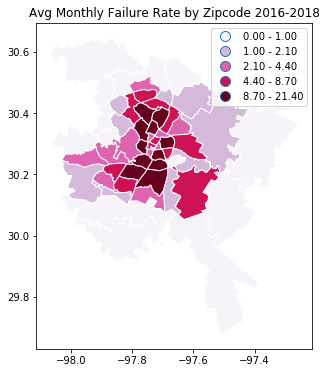

In [223]:
# Plot!
colName = 'Avg Failure Rate'
cmap=plt.cm.PuRd

fig, ax = plt.subplots(figsize=[6,6])
ax.set_aspect('equal')
newarea.plot(ax=ax, column=colName, cmap=cmap, scheme='quantiles', edgecolor='white', linewidth=1, legend=True)
# scheme=quantiles rather than equal intervals?
ax.set_title('Avg Monthly Failure Rate by Zipcode 2016-2018')
ax.patch.set_alpha(1)

fig.savefig(colName + 'Choropleth.pdf', format='pdf', dpi=600)

## PLOT: Network graph w/ sensors

(array([  5.26600000e+03,   9.21000000e+02,   1.46600000e+03,
          1.54000000e+02,   3.20000000e+01,   1.73000000e+02,
          0.00000000e+00,   8.00000000e+00,   0.00000000e+00,
          4.00000000e+00]),
 array([  24. ,   32.4,   40.8,   49.2,   57.6,   66. ,   74.4,   82.8,
          91.2,   99.6,  108. ]),
 <a list of 10 Patch objects>)

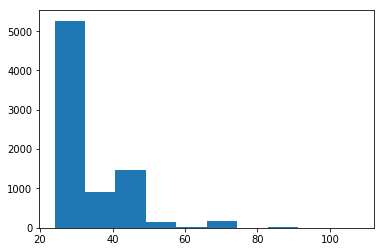

In [10]:
mains = pipes.loc[pipes['MAINDIAMET'] >= 24.00]

plt.hist(mains['MAINDIAMET'])

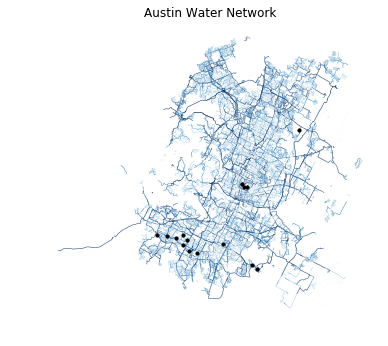

In [14]:
citySensors = citySensors.to_crs(pipes.crs)
uniSensors = uniSensors.to_crs(pipes.crs)

colName = 'MAINDIAMET'
cmap=plt.cm.Blues

fig, ax = plt.subplots(figsize=[6,6])
ax.set_aspect('equal')

pipes.plot(ax=ax, linewidth=.5, cmap=cmap, column=colName, scheme='quantiles', zorder=1)
#mains.plot(ax=ax, linewidth=.5, label='pipe', zorder=1)
citySensors.plot(ax=ax, facecolor='black', markersize=10, alpha=1, zorder=3)
uniSensors.plot(ax=ax, facecolor='black', markersize=10, alpha=1, zorder=2)

#ax.legend()
#leg = ax.get_legend()
#leg.set_bbox_to_anchor('upper left')
ax.set_title('Austin Water Network')
ax.axis('off')

fig.savefig('pipes.pdf', format='pdf', dpi=600)

In [25]:
print len(points)
print sum(pipes['SHAPE_Leng'])
print sum(pipes.geometry.length)*.305/(1000), "km"
print sum(pipes.geometry.length)/5280, "mi"
print pipes.crs
print sum(newarea.geometry.area)/(10**6), "sq km"
print sum(newarea.geometry.area)/(10**6)/2.59, "sq mi"
print newarea.crs
print sum(cut_area.geometry.area)/(10**6), "sq km"
print sum(cut_area.geometry.area)/(10**6)/2.59, "sq mi"
print cut_area.crs

3885
29544054.3803
9010.93060122 km
5595.46112843 mi
{u'lon_0': -100.3333333333333, u'datum': u'NAD83', u'y_0': 3000000, u'no_defs': True, u'proj': u'lcc', u'x_0': 699999.9999999999, u'units': u'us-ft', u'lat_2': 31.88333333333333, u'lat_1': 30.11666666666667, u'lat_0': 29.66666666666667}
5527.94865653 sq km
2134.34311063 sq mi
{'init': 'epsg:3857'}
1908.36486897 sq km
736.820412729 sq mi
{'init': 'epsg:3857'}


## PLOT: No time aspect, # of leaks per area:

In [12]:
# Count points within each polygon area
polyPtsNo = jm.countPtsInPoly(points, newarea)

# Check that all points were assigned, and all polygons accounted for
print sum(polyPtsNo) == len(points)
print len(polyPtsNo) == len(newarea)

# Add new data to area geodataframe
colName1 = 'Total Leaks'
newarea[colName1] = gpd.GeoSeries(polyPtsNo, index=newarea.index)
# method without warning below:
# but doesn't work as well when generalizing b/c of keyword at beginning
#newarea = newarea.assign(Total_Leaks=gpd.GeoSeries(polyPtsNo, index=newarea.index))

# density calculations
colName2 = 'Leaks Density'
newareaArea = newarea.area.divide(1000**2) # convert from m^2 to km^2
newarea[colName2] = newarea[colName1].divide(newareaArea)

True
True


C:\Users\jgz256\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jgz256\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


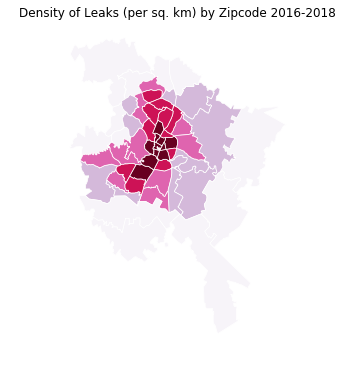

In [13]:
# Plot!
colName = 'Leaks Density'
cmap=plt.cm.PuRd

fig, ax = plt.subplots(figsize=[6,6])
ax.set_aspect('equal')
#newarea.plot(ax=ax, column=colName, cmap=cmap, scheme='quantiles', edgecolor='white', linewidth=0.75, legend=True)
newarea.plot(ax=ax, column=colName, cmap=cmap, scheme='quantiles', edgecolor='white', linewidth=0.75)
# scheme=quantiles rather than equal intervals?
ax.set_title('Density of Leaks (per sq. km) by Zipcode 2016-2018')
ax.patch.set_alpha(1)

#points.plot(ax=ax, marker='o', markersize=0.5)

ax.axis('off')
#leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.17, 1))
#citySensors = citySensors.to_crs(newarea.crs)
#citySensors.plot(ax=ax, facecolor='C0', markersize=5)
#uniSensors = uniSensors.to_crs(newarea.crs)
#uniSensors.plot(ax=ax, facecolor='C0', markersize=5)

fig.savefig(colName + 'Choropleth.pdf', format='pdf', dpi=600)

## Attempt to create interactive map

### Map on map (folium)

In [61]:
# Folium visualizes python on Leaflet (.js) map
import folium

In [62]:
# Pass starting coordinates
# Austin, TX
base = folium.Map(location=[30.2852, -97.7344], tiles='cartodbpositron')

In [63]:
# Convert to default CRS and a GeoJSON file
# NOTE: GeoJSON type uses epsg:4326 (WGS 84), so need reproject for folium
newarea = newarea.to_crs({'init':'epsg:4326'})

In [49]:
# check if file already exists
# if not, write new file
newarea.to_file('newarea_json.geojson', driver="GeoJSON")

DriverIOError: GeoJSON driver doesn't support creating a layer on a read-only datasource

{}

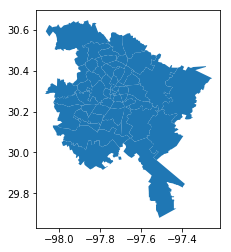

In [64]:
# checking
test = gpd.read_file('newarea_json.geojson')
test.plot()
test.crs

In [65]:
# NOTE: probably need to reload original base before running this cell
newarea_json = os.path.join('newarea_json.geojson')
folium.GeoJson(newarea_json, name='geojson').add_to(base)

folium.LayerControl().add_to(base)

base 

### Choropleth map (folium)

In [68]:
base = folium.Map(location=[30.2852, -97.7344], tiles='cartodbpositron')

# Create choropleth
base.choropleth(
    geo_data=newarea_json,
    name='choropleth',
    data=newarea,
    columns=['zipcode', 'Leaks Density'],
    key_on='feature.properties.zipcode',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Leak Density (per km^2)',
    highlight=True
)

In [69]:
#base = folium.Map(location=[30.2852, -97.7344], tiles='cartodbpositron')
# Create popups on ea. geojson feature by reading .geojson and 
# creating individual geojson objects in folium
# NOTE: at this time, this is a manual, slow hack. folium function in development
import json
with open(newarea_json) as f:
    data = json.load(f)
    #i = 0
    for feature in data['features']:
    #    if i == 0:
        gj = folium.GeoJson(feature, style_function=lambda feature: {
                'fillColor': 'white',
                'color': 'None',
                'weight': 0,
                'fillOpacity':0.2} )
        gj.add_child(folium.Popup('#Leaks: ' + str(feature['properties']['Total Leaks'])))
        gj.add_to(base)
    #    i += 1

folium.LayerControl().add_to(base)

# too big to display here I think. Saving is better for viewing:
base.save('choropleth_AustinLeaks.html')

## PLOT: Monthly main-failure rate by area

### Dot-Grid Map

### PLOT: Pipe w/ colors

### Map with hover